In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
metadata_file = "C:/Users/spigno/Documents/GitHub/PopulationData/MetagenomicData/MetadataMetgendata.csv"  # Percorso file metadati
metagenomic_data_file = "C:/Users/spigno/Documents/GitHub/PopulationData/MetagenomicData/RelabMetgendata.csv"  # Percorso file dati metagenomici
# Caricare i dataset
metadata = pd.read_csv(metadata_file)
metagenomic_data = pd.read_csv(metagenomic_data_file)

In [3]:

# Ottenere i nomi delle colonne corrispondenti
selected_columns = metadata.iloc[:, 0].tolist()  # Prima colonna contiene i nomi delle colonne

# Filtrare il dataset metagenomico per le colonne selezionate
df = metagenomic_data[selected_columns]


In [4]:
df_transposed = df.transpose()

data = df_transposed.to_numpy()


In [ ]:
 # Loop into all the columns/rows
for i in range(data.shape[1]):
    hist, bins = np.histogram(data[:, i], bins=np.logspace(-8, 1, 50), density=True)  # Bins logaritmici
    bins_mid = (bins[1:] + bins[:-1]) / 2
   
    plt.plot(bins_mid,hist)
    plt.xscale('log')
    plt.yscale('log')
    
plt.show()
      

In [6]:
# Definire i paesi da analizzare
countries = metadata["country"].unique()

In [ ]:
# Definire i paesi da analizzare
countries = metadata["country"].unique()

# Creare i subplots
fig, axes = plt.subplots(7,6, figsize=(20, 20), sharey=True)
axes = axes.flatten()  # Per semplificare l'accesso

for idx, country in enumerate(countries):
    # Filtrare i metadati per il paese
    country_filtered_metadata = metadata[metadata["country"] == country]
    
    # Ottenere i nomi delle colonne corrispondenti
    country_columns = country_filtered_metadata.iloc[:, 0].tolist()
    
    # Filtrare il dataset metagenomico per le colonne selezionate
    country_df = metagenomic_data[country_columns]
    country_df_transposed = country_df.transpose()
    
    # Convertire in numpy array per calcoli
    country_data = country_df_transposed.to_numpy()
    
    # Creare il grafico per il paese corrente
    for i in range(country_data.shape[1]):
        hist, bins = np.histogram(country_data[:, i], bins=np.logspace(-8, 1, 25), density=True)  # Bins logaritmici
        bins_mid = (bins[1:] + bins[:-1]) / 2

        axes[idx].plot(bins_mid, hist, label=f'Sample {i + 1}')
    
    # Impostare il titolo e le etichette degli assi
    axes[idx].set_title(f'{country.capitalize()}')
    axes[idx].set_xscale('log')
    axes[idx].set_yscale('log')

# Layout e legenda
fig.suptitle('Species Abundance Distribution by Country', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Per aggiungere spazio al titolo
plt.savefig("countries.png", dpi=300)
plt.show()
plt.close()


In [43]:
import pandas as pd
# 1. Crea un dizionario che mappa ogni codice paese al suo continente
iso_to_continent = {
    "ITA": "Europa",
    "USA": "North America",
    "GBR": "Europa",
    "DEU": "Europa",
    "SWE": "Europa",
    "FJI": "Oceania",
    "CHN": "Asia",
    "SGP": "Asia",
    "IDN": "Asia",
    "MYS": "Asia",
    "BRN": "Asia",
    "KAZ": "Asia",  # (Transcontinentale, ma spesso associato all’Asia)
    "BGD": "Asia",
    "CAN": "North America",
    "DNK": "Europa",
    "LUX": "Europa",
    "FRA": "Europa",
    "TZA": "Africa",
    "CMR": "Africa",
    "NLD": "Europa",
    "NOR": "Europa",
    "SVK": "Europa",
    "HUN": "Europa",
    "EST": "Europa",
    "ISL": "Europa",
    "FIN": "Europa",
    "PHL": "Asia",
    "ESP": "Europa",
    "AUT": "Europa",
    "IND": "Asia",
    "MDG": "Africa",
    "ETH": "Africa",
    "GHA": "Africa",
    "SLV": "North America", 
    "ISR": "Asia",
    "JPN": "Asia",
    "KOR": "Asia",
    "RUS": "Asia",  # Transcontinentale
    "PER": "South America",
    "MNG": "Asia",
    "LBR": "Africa",
    # ... (aggiungi qui tutti i codici che ti servono)
}

def add_continent_column(df, country="country", new_col="continent"):
  
    df[new_col] = df[country].map(iso_to_continent)
    return df

# Richiami la funzione per aggiungere la colonna "continent"
dfcont = add_continent_column(metadata, country="country", new_col="continent")



In [ ]:
# Definire i continenti da analizzare
filtered_metadata = metadata[
    (metadata["body_site"].isin(["stool"])) &
    (metadata["disease"].isin(["healthy"])) &
    (metadata["age_category"].isin(["adult"])) &
    (metadata["antibiotics_current_use"] != "yes")  # Escludere campioni con antibiotico "yes"
]

continents = filtered_metadata["continent"].dropna().unique()

# Creare i subplots 
fig, axes = plt.subplots(2, 3, figsize=(20, 15), sharey=True)
axes = axes.flatten()  # Per semplificare l'accesso

for idx, continent in enumerate(continents):
    # Filtrare i metadati per il continente
    continent_filtered_metadata = filtered_metadata[filtered_metadata["continent"] == continent]
    
    # Ottenere i nomi delle colonne corrispondenti al dataset metagenomico
    continent_columns = continent_filtered_metadata.iloc[:, 0].tolist()
    
    # Filtrare il dataset metagenomico per le colonne selezionate
    continent_df = metagenomic_data[continent_columns]
    continent_df_transposed = continent_df.transpose()
    
    # Convertire in numpy array per calcoli
    continent_data = continent_df_transposed.to_numpy()
    
    # Creare il grafico per il continente corrente
    for i in range(continent_data.shape[1]):
        hist, bins = np.histogram(continent_data[:, i], bins=np.logspace(-8, 1, 25), density=True)  # Bins logaritmici
        bins_mid = (bins[1:] + bins[:-1]) / 2

        axes[idx].plot(bins_mid, hist, label=f'Sample {i + 1}')
    
    # Impostare il titolo e le etichette degli assi
    axes[idx].set_title(f'{continent}')
    axes[idx].set_xlabel('Bins (log scale)')
    axes[idx].set_ylabel('')
    axes[idx].set_xscale('log')
    axes[idx].set_yscale('log')


# Layout e legenda
fig.suptitle('Species Abundance Distribution by Continent', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Per aggiungere spazio al titolo
plt.savefig("continents.png", dpi=300)
plt.show()
plt.close()

In [ ]:
# Definire i continenti da analizzare
filtered_metadata = metadata[
    (metadata["body_site"].isin(["stool"])) &
    (metadata["age_category"].isin(["adult"])) &
    (metadata["antibiotics_current_use"] != "yes")  # Escludere campioni con antibiotico "yes"
]
# Definire i paesi da analizzare
diseases = metadata["disease"].unique()

# Creare i subplots
fig, axes = plt.subplots(7,6, figsize=(20, 20), sharey=True)
axes = axes.flatten()  # Per semplificare l'accesso

for idx, disease in enumerate(diseases):
    # Filtrare i metadati per la malattia
    disease_filtered_metadata = metadata[metadata["disease"] == diseases[idx]]
    
    # Ottenere i nomi delle colonne corrispondenti
    disease_columns = disease_filtered_metadata.iloc[:, 0].tolist()
    
    # Filtrare il dataset metagenomico per le colonne selezionate
    disease_df = metagenomic_data[disease_columns]
    disease_df_transposed = disease_df.transpose()
    
    # Convertire in numpy array per calcoli
    disease_data = disease_df_transposed.to_numpy()
    
    # Creare il grafico per la malattia corrente
    for i in range(disease_data.shape[1]):
        hist, bins = np.histogram(disease_data[:, i], bins=np.logspace(-8, 1, 25), density=True)  # Bins logaritmici
        bins_mid = (bins[1:] + bins[:-1]) / 2

        axes[idx].plot(bins_mid, hist, label=f'Sample {i + 1}')
    
    # Impostare il titolo e le etichette degli assi
    axes[idx].set_title(f'{disease.capitalize()}')
    axes[idx].set_xscale('log')
    axes[idx].set_yscale('log')

# Layout e legenda
fig.suptitle('Species Abundance Distribution by Disease', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Per aggiungere spazio al titolo
plt.savefig("diseases.png", dpi=300)
plt.show()
plt.close()

c:\Users\spigno\miniconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\spigno\AppData\Local\Temp\ipykernel_39572\49641110.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(loc='upper right')
c:\Users\spigno\miniconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


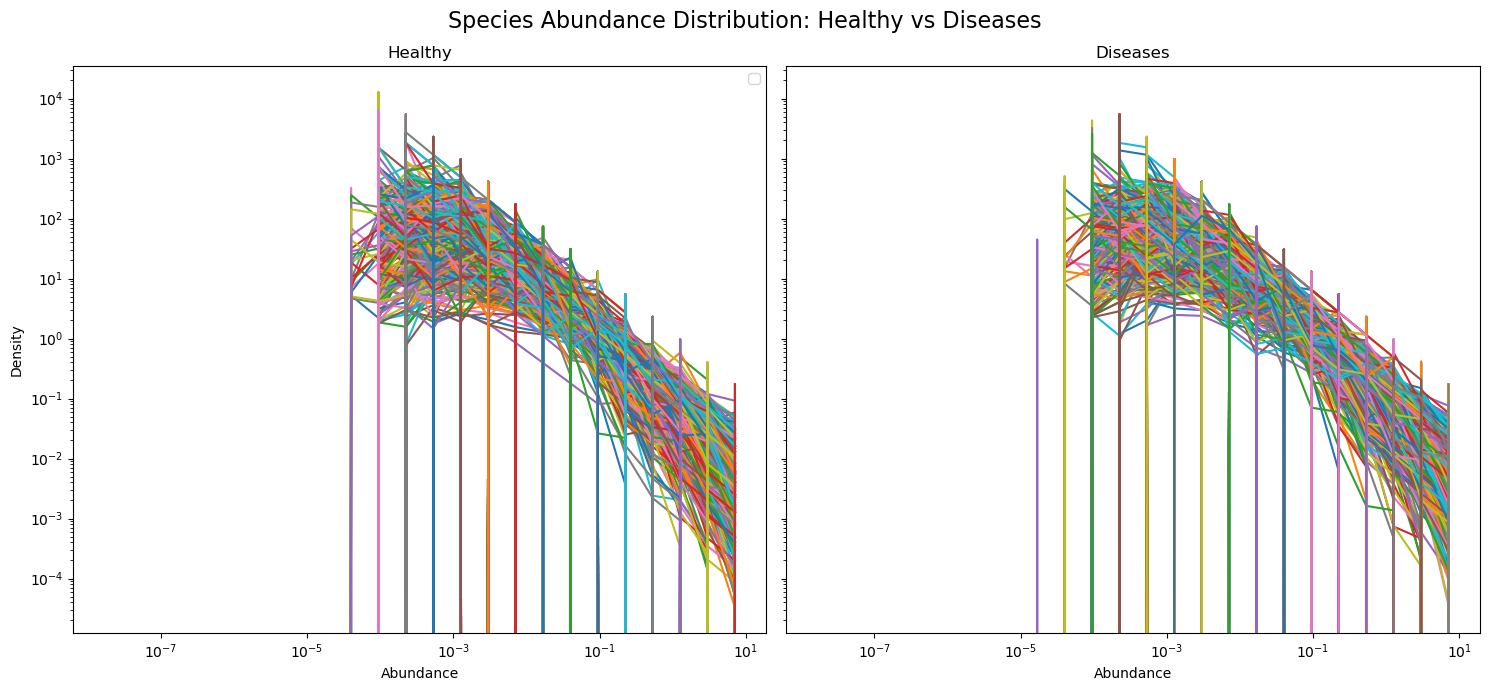

In [55]:
import numpy as np
import matplotlib.pyplot as plt
# Definire i continenti da analizzare
filtered_metadata = metadata[
    (metadata["body_site"].isin(["stool"])) &
    (metadata["age_category"].isin(["adult"])) &
    (metadata["antibiotics_current_use"] != "yes")  # Escludere campioni con antibiotico "yes"
]

# Filtrare i metadati per i campioni "healthy"
healthy_metadata = filtered_metadata[filtered_metadata["disease"] == "healthy"]
healthy_columns = healthy_metadata.iloc[:, 0].tolist()

# Filtrare il dataset metagenomico per i campioni "Healthy"
healthy_df = metagenomic_data[healthy_columns]
healthy_df_transposed = healthy_df.transpose()

# Convertire in numpy array per calcoli
healthy_data = healthy_df_transposed.to_numpy()

# Creare il plot per i campioni "Healthy"
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

for i in range(healthy_data.shape[1]):
    hist, bins = np.histogram(healthy_data[:, i], bins=np.logspace(-8, 1, 25), density=True)  # Bins logaritmici
    bins_mid = (bins[1:] + bins[:-1]) / 2
    axes[0].plot(bins_mid, hist)

axes[0].set_title('Healthy')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlabel('Abundance')
axes[0].set_ylabel('Density')
axes[0].legend(loc='upper right')

# Filtrare i metadati per tutte le altre malattie
non_healthy_metadata = metadata[metadata["disease"] != "healthy"]
non_healthy_columns = non_healthy_metadata.iloc[:, 0].tolist()

# Filtrare il dataset metagenomico per tutte le altre malattie
non_healthy_df = metagenomic_data[non_healthy_columns]
non_healthy_df_transposed = non_healthy_df.transpose()

# Convertire in numpy array per calcoli
non_healthy_data = non_healthy_df_transposed.to_numpy()

# Creare il plot per tutte le altre malattie
for i in range(non_healthy_data.shape[1]):
    hist, bins = np.histogram(non_healthy_data[:, i], bins=np.logspace(-8, 1, 25), density=True)  # Bins logaritmici
    bins_mid = (bins[1:] + bins[:-1]) / 2
    axes[1].plot(bins_mid, hist)

axes[1].set_title('Diseases')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('Abundance')

# Layout e salvataggio
fig.suptitle('Species Abundance Distribution: Healthy vs Diseases', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Per aggiungere spazio al titolo
plt.savefig("healthy_vs_diseases.png", dpi=300)
plt.show()
plt.close()